## 匯入資料

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
iris = load_iris()
X = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.DataFrame(iris['target'], columns=['Species'])
df = pd.concat([X,y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 檢查資料

In [17]:
print(df.isnull().values.sum())
print("資料筆數:", df.shape)
print("資料的欄位名稱，分別是:", df.keys())
print("第一筆的資料內容:", df.iloc[0,::])
print("第一筆的預測目標:", df['Species'][0])

0
資料筆數: (150, 5)
資料的欄位名稱，分別是: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')
第一筆的資料內容: sepal length (cm)    5.1
sepal width (cm)     3.5
petal length (cm)    1.4
petal width (cm)     0.2
Species              0.0
Name: 0, dtype: float64
第一筆的預測目標: 0


## 整理資料--欄位名稱中文化

In [18]:
df.rename(columns={"sepal length (cm)":"萼片長(公分)",
                   "sepal width (cm)":"萼片寬(公分)",
                   "petal length (cm)":"花瓣長(公分)",
                   "petal width (cm)":"花瓣寬(公分)",
                   "Species":"種類"},inplace=True)
irdict = {
    0:"山鳶尾",
    1:"染色鳶尾",
    2:"維吉尼亞鳶尾"
}
df["種類"] = df["種類"].map(irdict)
print(df.head())
print(df.groupby('種類').size())

   萼片長(公分)  萼片寬(公分)  花瓣長(公分)  花瓣寬(公分)   種類
0      5.1      3.5      1.4      0.2  山鳶尾
1      4.9      3.0      1.4      0.2  山鳶尾
2      4.7      3.2      1.3      0.2  山鳶尾
3      4.6      3.1      1.5      0.2  山鳶尾
4      5.0      3.6      1.4      0.2  山鳶尾
種類
山鳶尾       50
染色鳶尾      50
維吉尼亞鳶尾    50
dtype: int64


## 整理資料--使用sns繪製分布圖

<Figure size 432x288 with 0 Axes>

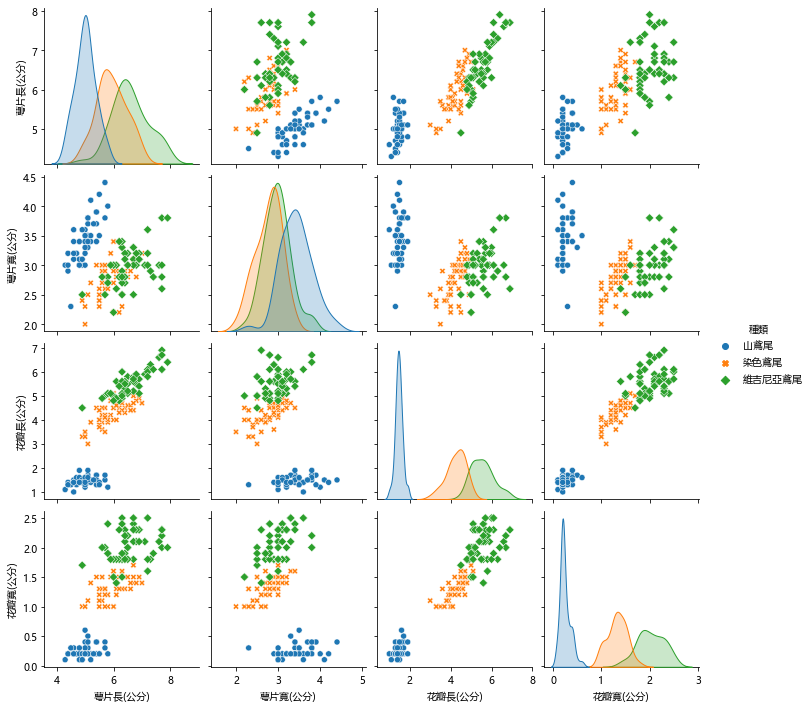

<Figure size 432x288 with 0 Axes>

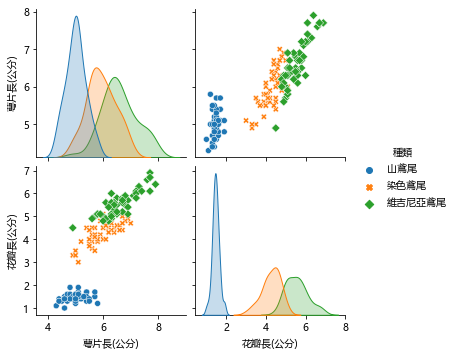

In [19]:
plt.figure()
sns.pairplot(df, hue = "種類", markers=["o", "X", "D"])
plt.show()
plt.figure()
sns.pairplot(df, hue = "種類", markers=["o", "X", "D"], vars=["萼片長(公分)","花瓣長(公分)"])
plt.show()

In [20]:
X = df[['萼片長(公分)','萼片寬(公分)','花瓣長(公分)','花瓣寬(公分)']]
y = df[['種類']]
train_X , test_X , train_y , test_y = train_test_split(X, y['種類'],test_size=0.3,random_state=42)
print("訓練集的維度大小:   ", train_X.shape)
print("測試集的維度大小:   ", test_X.shape)

訓練集的維度大小:    (105, 4)
測試集的維度大小:    (45, 4)


## 建立與訓練模型

In [21]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=3)

## 預測與評估模型

In [22]:
pred_y = model.predict(test_X)
print(accuracy_score(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))

1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


## 找出K值

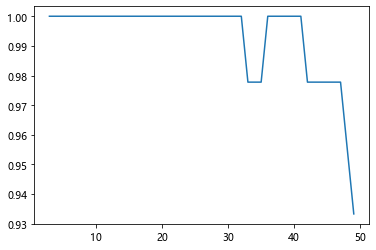

In [23]:
accuracy = []
for i in range(3, 50):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    pred_y = model.predict(test_X)
    accuracy.append(accuracy_score(test_y, pred_y))
i = range(3, 50)
plt.plot(i, accuracy)
plt.show()